In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting

warnings.filterwarnings("ignore")
pd.set_option("display.float_format", "{:,.2f}".format)

In [2]:
ticker = "^SPX"
stock = yf.Ticker(ticker.upper())
history = stock.history(period="max")

In [3]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"24,378.00","24,378.00","24,378.00","24,378.00","24,378.00","24,378.00","24,378.00"
mean,640.92,664.46,656.57,660.76,"920,786,075.56",0.00,0.00
std,"1,101.59","1,096.59","1,084.50","1,090.91","1,628,888,102.16",0.00,0.00
min,0.00,4.40,4.40,4.40,0.00,0.00,0.00
25%,9.74,24.75,24.75,24.75,"1,540,000.00",0.00,0.00
50%,43.50,103.49,101.81,102.59,"20,765,000.00",0.00,0.00
75%,"1,050.28","1,059.56","1,043.42","1,050.76","1,039,625,000.00",0.00,0.00
max,"6,089.03","6,099.97","6,079.98","6,090.27","11,456,230,000.00",0.00,0.00


In [4]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.66,17.66,17.66,17.66,0,0.00,0.00
1928-01-03 00:00:00-05:00,17.76,17.76,17.76,17.76,0,0.00,0.00
1928-01-04 00:00:00-05:00,17.72,17.72,17.72,17.72,0,0.00,0.00
1928-01-05 00:00:00-05:00,17.55,17.55,17.55,17.55,0,0.00,0.00
1928-01-06 00:00:00-05:00,17.66,17.66,17.66,17.66,0,0.00,0.00
...,...,...,...,...,...,...,...
2025-01-13 00:00:00-05:00,"5,782.02","5,838.61","5,773.31","5,836.22",4421200000,0.00,0.00
2025-01-14 00:00:00-05:00,"5,859.27","5,871.92","5,805.42","5,842.91",4142280000,0.00,0.00
2025-01-15 00:00:00-05:00,"5,905.21","5,960.61","5,905.21","5,949.91",4544570000,0.00,0.00


In [5]:
history["date"] = pd.to_datetime(history.index)
last_date_each_year = history.groupby(history["date"].dt.day).all()
last_date_each_year

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
date,,,,,,,,
1,False,True,True,True,False,False,False,True
2,False,True,True,True,False,False,False,True
3,False,True,True,True,False,False,False,True
4,False,True,True,True,False,False,False,True
5,False,True,True,True,False,False,False,True
6,False,True,True,True,False,False,False,True
7,False,True,True,True,False,False,False,True
8,False,True,True,True,False,False,False,True
9,False,True,True,True,False,False,False,True


In [6]:
stock.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5937.34,
 'open': 5995.4,
 'dayLow': 5978.44,
 'dayHigh': 6014.96,
 'regularMarketPreviousClose': 5937.34,
 'regularMarketOpen': 5995.4,
 'regularMarketDayLow': 5978.44,
 'regularMarketDayHigh': 6014.96,
 'volume': 2988514444,
 'regularMarketVolume': 2988514444,
 'averageVolume': 4111234833,
 'averageVolume10days': 4333400000,
 'averageDailyVolume10Day': 4333400000,
 'bid': 5947.41,
 'ask': 6033.75,
 'fiftyTwoWeekLow': 4844.05,
 'fiftyTwoWeekHigh': 6099.97,
 'fiftyDayAverage': 5962.114,
 'twoHundredDayAverage': 5585.668,
 'currency': 'USD',
 'exchange': 'WCB',
 'quoteType': 'INDEX',
 'symbol': '^SPX',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500 INDEX',
 'longName': 'S&P 500 INDEX',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': '598377dc-b757-301a-9621-bbef63eca4d0',
 'messageBoardId': 'finmb_INDEXSPX',
 'gmtOffSetMilliseconds': -18000000,
 'trailingPegR

In [7]:
stock.financials

""


In [8]:
stock.cash_flow

""


In [9]:
stock.balance_sheet

""


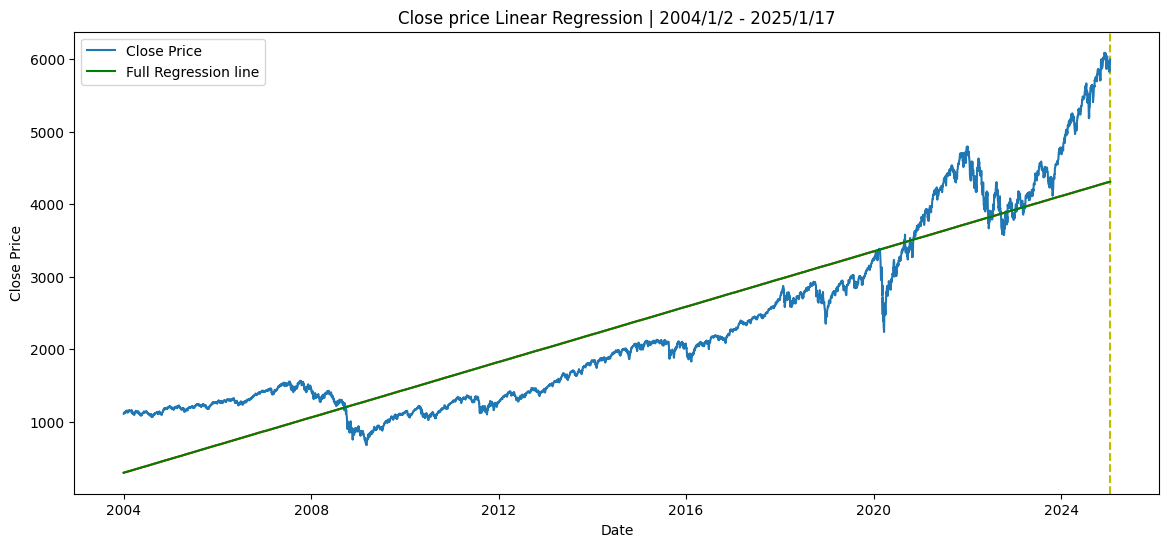

Coefficient (slope): 0.7582451785656235


In [10]:
a = plotting.plot_regression_line(history, reg_line_count=0, log_scale=False)

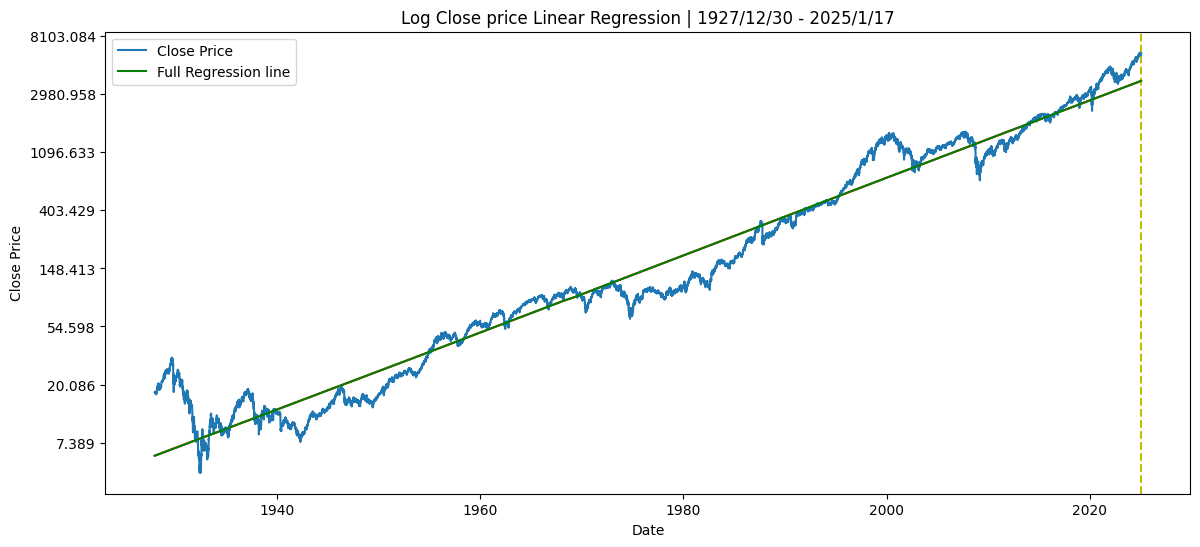

Coefficient (slope): 0.00026478623544572036


<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [11]:
plotting.plot_regression_line(history, reg_line_count=1, log_scale=True)

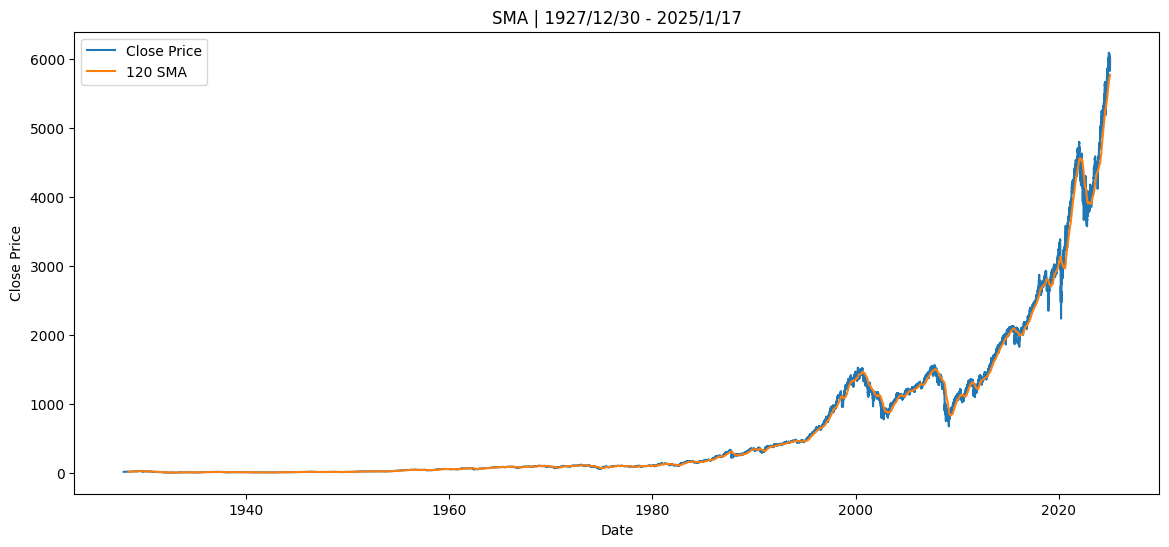

<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [12]:
plotting.plot_sma(history, [120, ], hide_data=False)

<BarContainer object of 24378 artists>

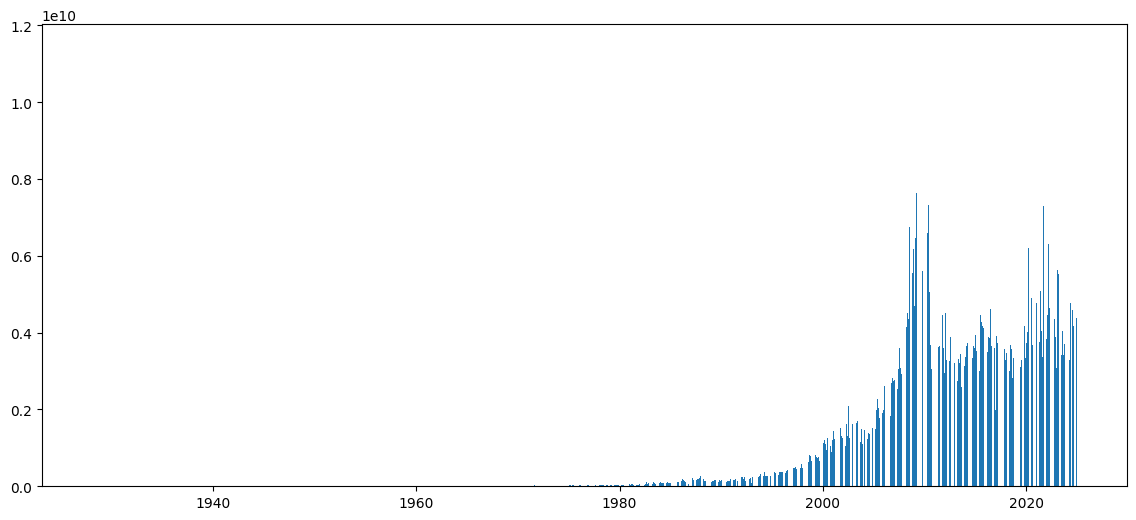

In [13]:
plt.figure(figsize=(14, 6))
plt.bar(history.index, history["Volume"])

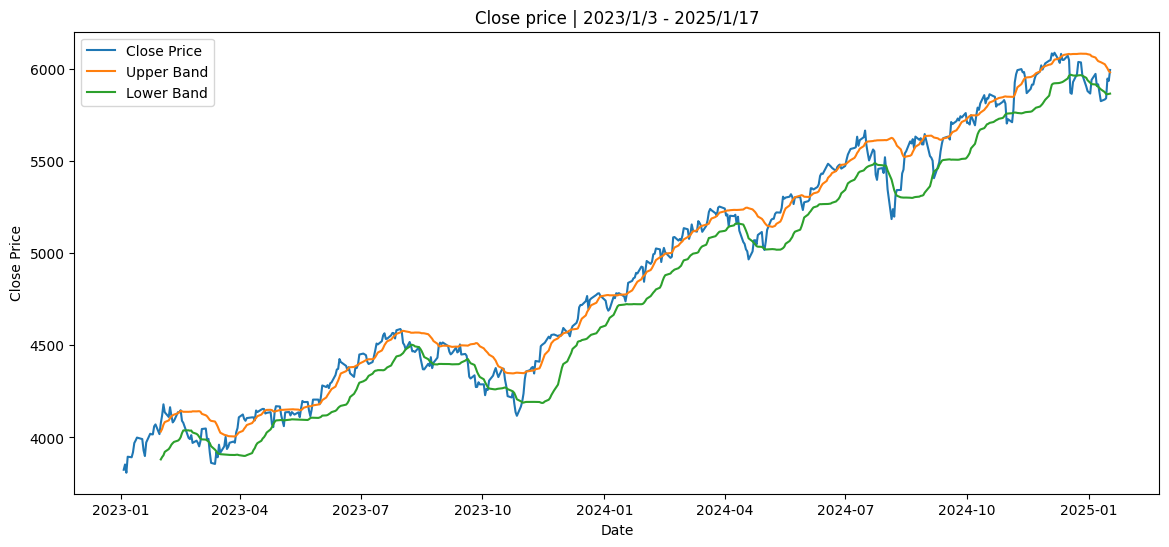

In [14]:
plotting.plot_bolinger_bands(history["2023":], 20, 1)

In [15]:
import ta
import pandas as pd
from ta.utils import dropna

history = history["2020":]
indicator = ta.momentum.RSIIndicator(history["Close"])

history["Indicator"] = indicator.rsi()

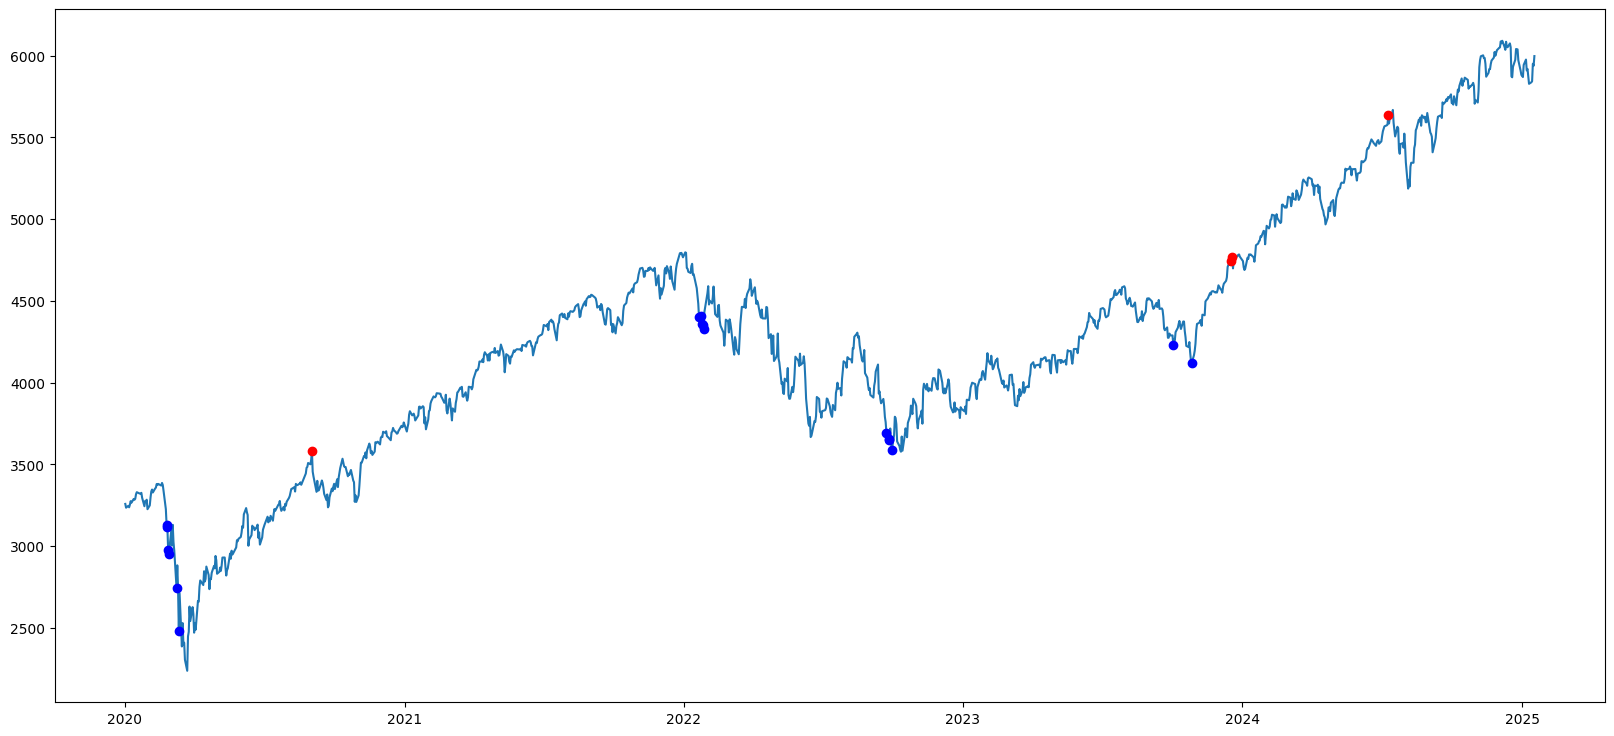

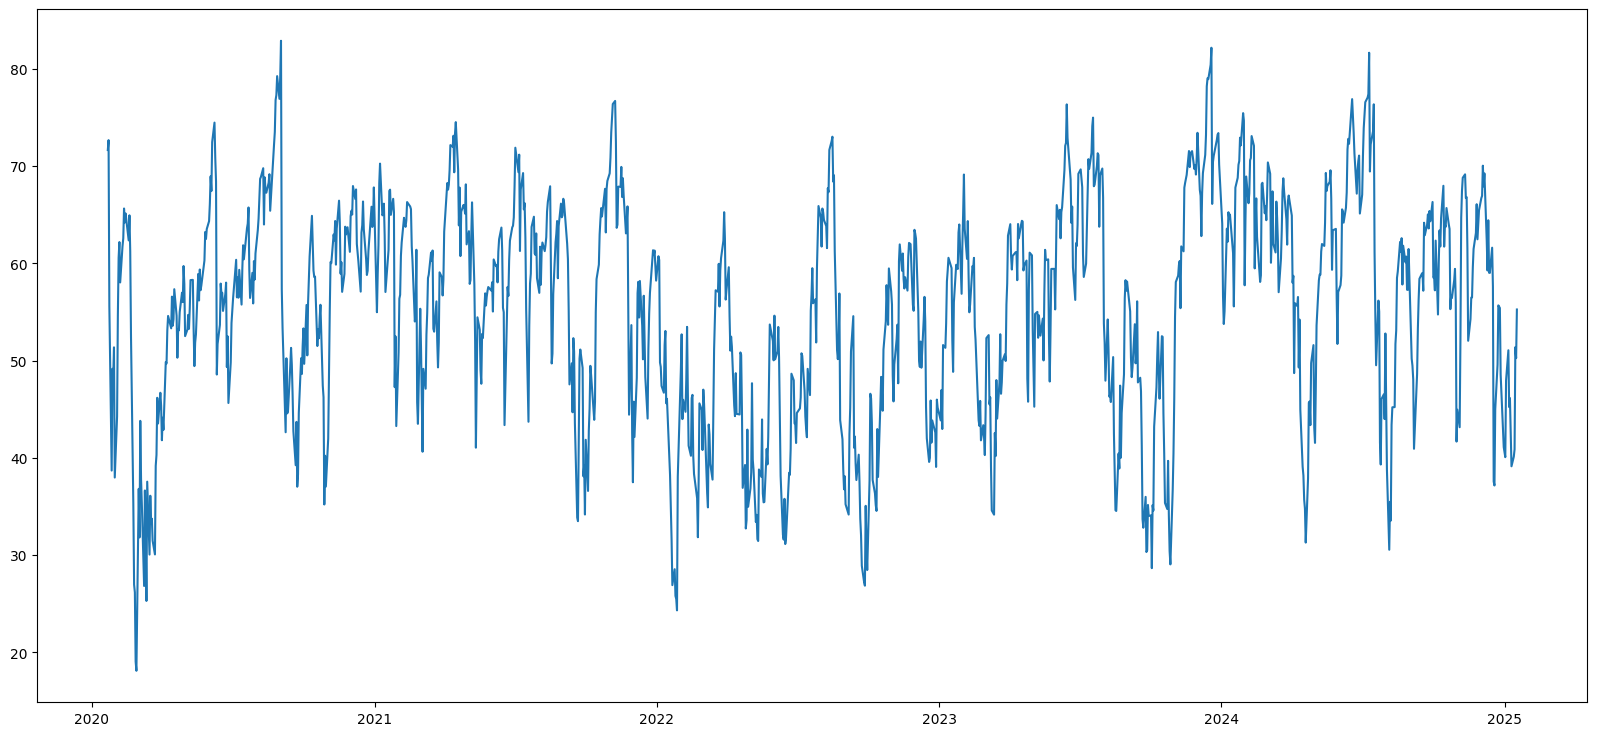

In [16]:
plt.figure(figsize=(20, 9))
plt.plot(history["Close"])
filter_high = history["Indicator"] >= 80
filter_low = history["Indicator"] <= 30
plt.plot(
    history.index[filter_high],
    history["Close"][filter_high],
    marker="o",
    linestyle="None",
    color="red",
)
plt.plot(
    history.index[filter_low],
    history["Close"][filter_low],
    marker="o",
    linestyle="None",
    color="blue",
)
plt.figure(figsize=(20, 9))
plt.plot(history["Indicator"])

In [17]:
type(history["Close"])

pandas.core.series.Series